# Compute performance metrics for the given Y and Y_score without sklearn

In [132]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [133]:
#This function calculates the TN,FN,TP,FP
def confusion(a,b,DATA):
    x1=DATA[(DATA['y-pred']==b) & (DATA['y']==a)]['y'].count()
    return x1

In [135]:
#This function calculates the F1 Sscore
def F1(Pr,Re):
    F=2*((Pr*Re)/(Pr+Re))
    return F

In [136]:
# This section computes the Confusion Matrix by calling the function confusion
dt=pd.read_csv("5_a.csv")

a = np.array(dt['proba'].values.tolist()) # converting the column proba to a numpy array for generating the binary labels 
j = np.where(a >= 0.5, 1, 0).tolist() # predicted value >=0.5 1 else 0


df=pd.DataFrame(j,columns=['y-pred']) 


data=pd.concat([dt,df],axis=1)


l1=[]
l2=[]
TN=confusion(0,0,data)
l1.append(TN)
FN=confusion(1,0,data)
l1.append(FN)
FP=confusion(0,1,data)
l2.append(FP)
TP=confusion(1,1,data)
l2.append(TP)

n=np.matrix([l1,l2])
print("Confusion Matrix \n",n)
print("="*50)

#*****************************************************************************************
#This section computes the F1 score by calling the function F1

P=data[data['y']==1]['y'].count()
N=data[data['y']==0]['y'].count()
Recall=TP/P

Precision=TP/(TP+FP)

F1Score=F1(Precision,Recall)
print("F1Score  \n",F1Score)
print("="*50)

#*****************************************************************************************
#This section computes the accuracy

Accuracy=(TP+TN)/(TP+FP+TN+FN)
print("Accuracy \n",Accuracy)
print("="*50)

#*****************************************************************************************
#This section computes the Area Under The Curve for ROC 

r=np.unique(data['proba'].values)
data=data.sort_values('proba',ascending=False)

q=-np.sort(-r,axis=0) #Sorting thresholds in descending order

TPR=[]
FPR=[]
for e in q:
    
    z1=(data['proba']>=e) & (data['y']==1) #Generating True Positives
    tp=z1[z1==True].count()
    
    z2=(data['proba']>=e) & (data['y']==0) #Generating False Positives
    fp=z2[z2==True].count()
    
                
        
    
    TPR.append(tp/P)
    FPR.append(fp/N)
auc=np.trapz(TPR,FPR)

print("AUC \n",auc)
    
    

Confusion Matrix 
 [[    0     0]
 [  100 10000]]
F1Score  
 0.9950248756218906
Accuracy 
 0.9900990099009901
AUC 
 0.48829900000000004


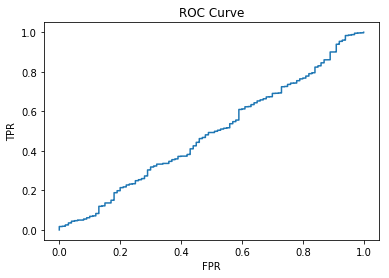

In [127]:
#ROC for 5_a.csv
import matplotlib.pyplot as plt


plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC Curve')
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [137]:
# This section computes the Confusion Matrix by calling the function confusion
dt=pd.read_csv("5_b.csv")

a = np.array(dt['proba'].values.tolist()) # converting the column proba to a numpy array for generating the binary labels 
j = np.where(a >= 0.5, 1, 0).tolist()     # predicted value >=0.5 1 else 0


df=pd.DataFrame(j,columns=['y-pred'])


data=pd.concat([dt,df],axis=1)


l1=[]
l2=[]
TN=confusion(0,0,data)
l1.append(TN)
FN=confusion(1,0,data)
l1.append(FN)
FP=confusion(0,1,data)
l2.append(FP)
TP=confusion(1,1,data)
l2.append(TP)

n=np.matrix([l1,l2])
print("Confusion Matrix \n",n)
print("="*50)

#*****************************************************************************************
#This section computes the F1 score by calling the function F1

P=data[data['y']==1]['y'].count()
N=data[data['y']==0]['y'].count()
Recall=TP/P

Precision=TP/(TP+FP)

F1Score=F1(Precision,Recall)
print("F1Score  \n",F1Score)
print("="*50)

#*****************************************************************************************
#This section computes the accuracy

Accuracy=(TP+TN)/(TP+FP+TN+FN)
print("Accuracy \n",Accuracy)
print("="*50)

#*****************************************************************************************
#This section computes the Area Under The Curve for ROC 
r=np.unique(data['proba'].values)
data=data.sort_values('proba',ascending=False)

q=-np.sort(-r,axis=0) #Sorting thresholds in descending order

TPR=[]
FPR=[]
for e in q:
    
    z1=(data['proba']>=e) & (data['y']==1) #Generating True Positives
    tp=z1[z1==True].count()
    
    z2=(data['proba']>=e) & (data['y']==0) #Generating False Positives
    fp=z2[z2==True].count()
    
                
        
    
    TPR.append(tp/P)
    FPR.append(fp/N)
auc=np.trapz(TPR,FPR)
print("AUC \n",auc)

Confusion Matrix 
 [[9761   45]
 [ 239   55]]
F1Score  
 0.2791878172588833
Accuracy 
 0.9718811881188119
AUC 
 0.9377570000000001


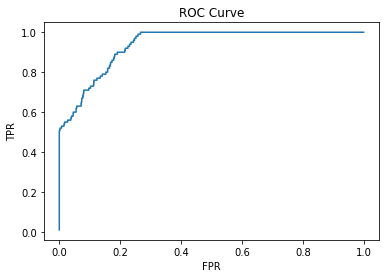

In [129]:
#ROC for 5_b.csv
import matplotlib.pyplot as plt


plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC Curve')
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [130]:
#This section computes the best threshold for metrics A

dt=pd.read_csv("5_c.csv")
n=np.unique(dt['prob'].values)

q=-np.sort(-n,axis=0) #Sorting thresholds in descending order
dt=dt.sort_values('prob',ascending=False)
dict={}

for e in q: #iterating thresholds
    fn=0
    fp=0
    z1=(dt['prob']<e) & (dt['y']==1) #calculating False Negatives
    fn=z1[z1==True].count()
    
    z2=(dt['prob']>=e) & (dt['y']==0) #calculating False Positives
    fp=z2[z2==True].count()
    
    A=(500*fn)+(100*fp)
    dict[e]=A
    
k=min(dict, key=dict.get)
print("Best Threshold \n",k)
print("="*50)

Best Threshold 
 0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [131]:
#This section computes the Mean Square Error

dataf=pd.read_csv("5_d.csv")

dataf['y-yPred']=dataf['y']-dataf['pred'] #calculating actual - predicted

dataf['y-yPredSquared']=dataf['y-yPred']*dataf['y-yPred'] #calculating (actual-predicted)^2

S=dataf['y-yPredSquared'].sum() #SSResidual
n=dataf['y'].count()
MSE=S/n
print("Mean Square Error \n",MSE)
print("="*50)

#*****************************************************************************************
#This section computes the Mean Absolute Percentage Error

a=dataf['y'].sum()
dataf['y-yPred']=dataf['y-yPred'].abs()

ei=dataf['y-yPred'].sum()
MAPE=ei/a
print("Mean Absolute Percentage Error \n",MAPE)
print("="*50)

#*****************************************************************************************
#This section computes the R^2 error

ymean=(dataf['y'].sum())/dataf['y'].count()

dataf['y']=(dataf['y']-ymean)*(dataf['y']-ymean)

SSTotal=dataf['y'].sum()

RSquare=1-(S/SSTotal)
print(" R^2 Error \n",RSquare)

Mean Square Error 
 177.16569974554707
Mean Absolute Percentage Error 
 0.1291202994009687
 R^2 Error 
 0.9563582786990937
